IMPORTING THE NECESSAY LIBRARIES AND OBJECTS

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
modell= LogisticRegression()

from sklearn.metrics import confusion_matrix

from sklearn import tree
modeld=tree.DecisionTreeClassifier()

from sklearn.svm import SVC
models=SVC()

from sklearn.ensemble import RandomForestClassifier
modelr=RandomForestClassifier()

from sklearn.model_selection import cross_val_score

from sklearn.cluster import KMeans

from sklearn.preprocessing import MinMaxScaler

from sklearn.naive_bayes import GaussianNB
modelg=GaussianNB()

from sklearn.naive_bayes import MultinomialNB
modelm=MultinomialNB()

from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import RandomizedSearchCV

READING THE FILE AND CHECKING FOR NULL DATA 

In [2]:
df=pd.read_csv('train_data.csv')
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [3]:
df.shape

(252000, 13)

In [4]:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [5]:
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


PRIMARY DATA ANALYSIS AND GRAPHS FOR BETTER UNDERSTANDING OF THE GIVEN DATA 

WE CAN USE SEABORN AND MATPLOTLIB FOR THIS STEP

In [7]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [8]:
df.Risk_Flag.value_counts()

0    221004
1     30996
Name: Risk_Flag, dtype: int64

In [9]:
sns.set_palette(sns.color_palette('Blues_r',3))

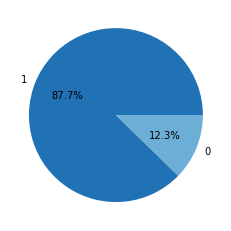

In [10]:
plt.pie(df.Risk_Flag.value_counts(),autopct='%1.1f%%', labels=['1','0'])
plt.show()

MOST OF THE DATA IS CONTAINS RISK_FLAG =1 WHICH MAY CAUSE A PROBLEM DURING PREDICTIONS

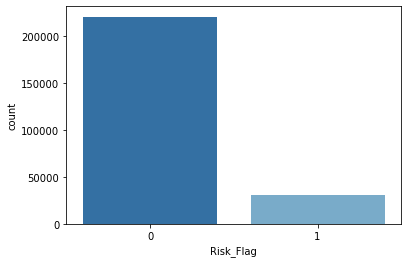

In [11]:
sns.countplot(x="Risk_Flag", data=df)

In [12]:
p=df.groupby('Risk_Flag')['Risk_Flag'].count()

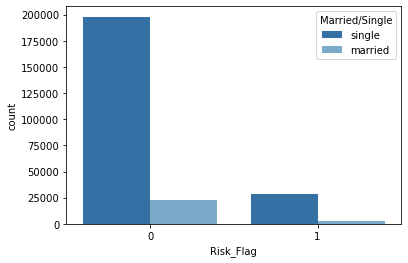

In [13]:
sns.countplot(x="Risk_Flag", hue="Married/Single",data=df)

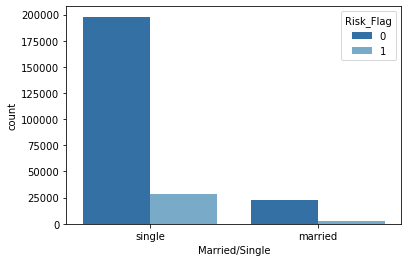

In [14]:
sns.countplot(x="Married/Single", hue="Risk_Flag",data=df)

In [15]:
marital_status_risk_flag = pd.crosstab( df["Risk_Flag"], df["Married/Single"],normalize='index')
marital_status_risk_flag

Married/Single,married,single
Risk_Flag,,
0,0.104487,0.895513
1,0.085043,0.914957


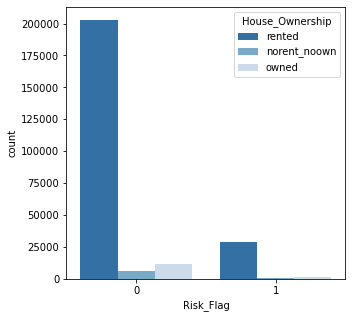

In [16]:
plt.figure(figsize=(5,5)) 
sns.countplot(x="Risk_Flag", hue="House_Ownership",data=df)

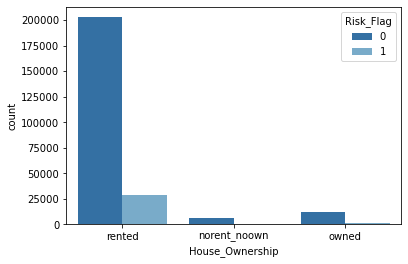

In [17]:
sns.countplot(hue="Risk_Flag", x="House_Ownership",data=df)

In [18]:
house_status_risk_flag = pd.crosstab(df["House_Ownership"], df["Risk_Flag"], normalize='index',margins=True)
house_status_risk_flag

Risk_Flag,0,1
House_Ownership,,
norent_noown,0.900473,0.099527
owned,0.910203,0.089797
rented,0.874423,0.125577
All,0.877000,0.123000


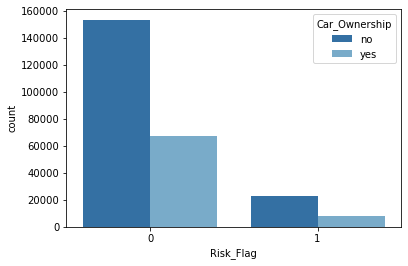

In [19]:
sns.countplot(x="Risk_Flag", hue="Car_Ownership",data=df)

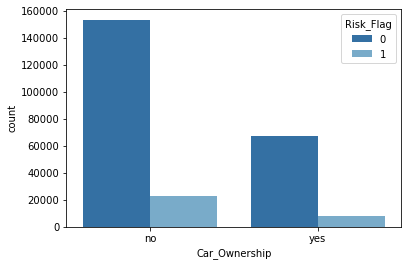

In [20]:
sns.countplot(hue="Risk_Flag", x="Car_Ownership",data=df)

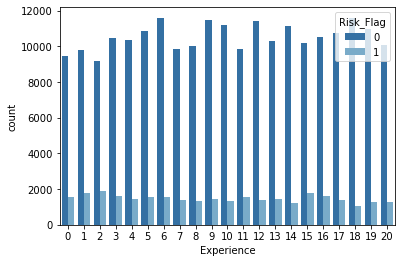

In [21]:
sns.countplot(hue="Risk_Flag", x="Experience",data=df,)

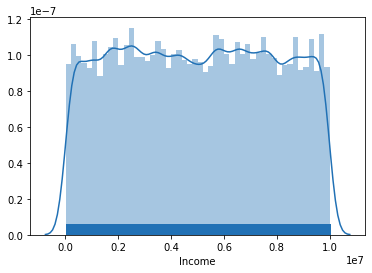

In [22]:
sns.distplot(a=df.Income,  rug=True)

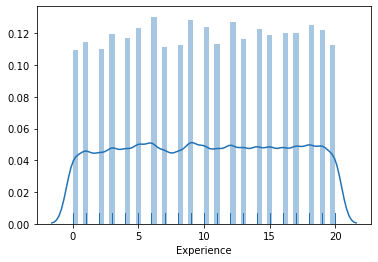

In [23]:
sns.distplot(a=df.Experience,  rug=True)

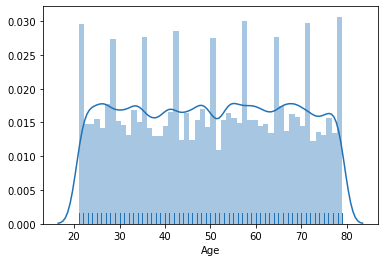

In [24]:
sns.distplot(a=df.Age,  rug=True)

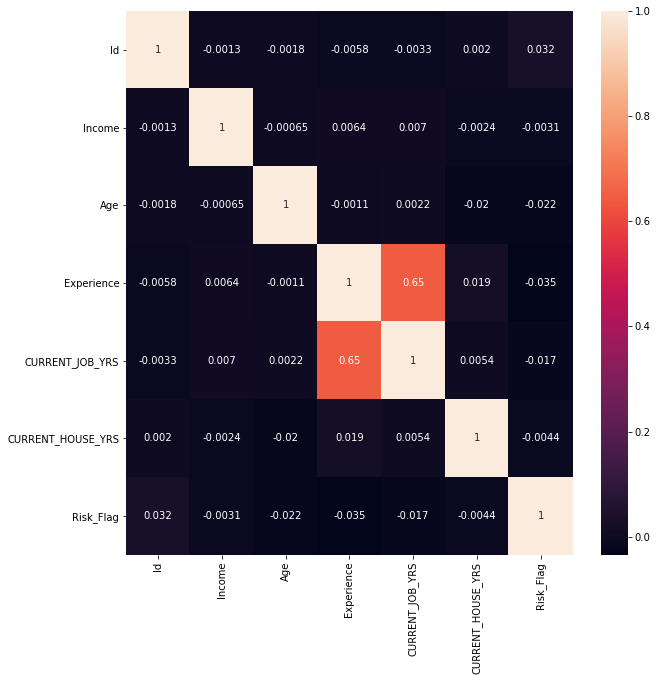

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True);

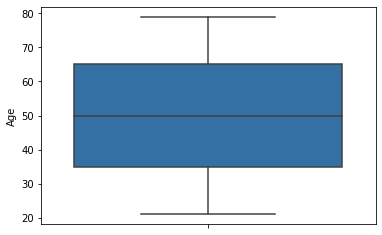

In [26]:
sns.boxplot(y=df.Age, data=df)

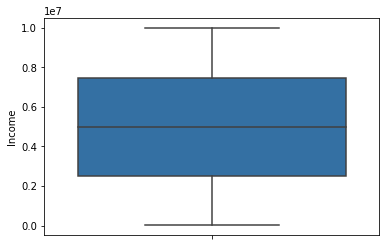

In [27]:
sns.boxplot(y=df.Income, data=df)

SUMMARY 
1) Data contains 87% risk flags=1 which is heavily skewed
2) There are no outliers 
3) corelation plot shows that experience and current job years have good corelation and we can exclude one of them during model predition
4) 3 columns martial status , houseand car ownership can be encoded to convert the categorical to number data

ML PREDICTION MODEL 

In [28]:
df

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [29]:
len(df.Profession.unique())

51

In [30]:
(df.STATE.unique())

array(['Madhya_Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil_Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra_Pradesh',
       'West_Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar_Pradesh', 'Himachal_Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu_and_Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Uttar_Pradesh[5]', 'Manipur', 'Sikkim'], dtype=object)

In [31]:
df.CITY.unique()

array(['Rewa', 'Parbhani', 'Alappuzha', 'Bhubaneswar',
       'Tiruchirappalli[10]', 'Jalgaon', 'Tiruppur', 'Jamnagar',
       'Kota[6]', 'Karimnagar', 'Hajipur[31]', 'Adoni', 'Erode[17]',
       'Kollam', 'Madurai', 'Anantapuram[24]', 'Kamarhati', 'Bhusawal',
       'Sirsa', 'Amaravati', 'Secunderabad', 'Ahmedabad', 'Ajmer',
       'Ongole', 'Miryalaguda', 'Ambattur', 'Indore', 'Pondicherry',
       'Shimoga', 'Chennai', 'Gulbarga', 'Khammam', 'Saharanpur',
       'Gopalpur', 'Amravati', 'Udupi', 'Howrah', 'Aurangabad[39]',
       'Hospet', 'Shimla', 'Khandwa', 'Bidhannagar', 'Bellary', 'Danapur',
       'Purnia[26]', 'Bijapur', 'Patiala', 'Malda', 'Sagar', 'Durgapur',
       'Junagadh', 'Singrauli', 'Agartala', 'Thanjavur', 'Hindupur',
       'Naihati', 'North_Dumdum', 'Panchkula', 'Anantapur', 'Serampore',
       'Bathinda', 'Nadiad', 'Kanpur', 'Haridwar', 'Berhampur',
       'Jamshedpur', 'Hyderabad', 'Bidar', 'Kottayam', 'Solapur',
       'Suryapet', 'Aizawl', 'Asansol', 'Deoghar'

In [32]:
y=df.Risk_Flag

In [33]:
x=df.drop(['Id','Risk_Flag','CITY','Profession'], axis='columns')
x.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1303834,23,3,single,rented,no,Madhya_Pradesh,3,13
1,7574516,40,10,single,rented,no,Maharashtra,9,13
2,3991815,66,4,married,rented,no,Kerala,4,10
3,6256451,41,2,single,rented,yes,Odisha,2,12
4,5768871,47,11,single,rented,no,Tamil_Nadu,3,14


In [34]:
df

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [35]:
en = LabelEncoder()
cols = ["Married/Single","House_Ownership","Car_Ownership","STATE"]
for col in cols:
    x[col] = en.fit_transform(x[col])

In [36]:
x.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1303834,23,3,1,2,0,13,3,13
1,7574516,40,10,1,2,0,14,9,13
2,3991815,66,4,0,2,0,12,4,10
3,6256451,41,2,1,2,1,17,2,12
4,5768871,47,11,1,2,0,22,3,14


SCALING THE AGE EXPERIENCE CURRENT JOB, HOUSE COLUMNS FOR BETTER RESULTS


In [37]:
scaler=MinMaxScaler()
scaler.fit(x[['Income','Age','Experience', 'CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']])
x[['Income','Age','Experience', 'CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']]=scaler.transform(x[['Income','Age','Experience', 'CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']])

In [38]:
x

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,0.129487,0.034483,0.15,1,2,0,13,0.214286,0.75
1,0.757206,0.327586,0.50,1,2,0,14,0.642857,0.75
2,0.398564,0.775862,0.20,0,2,0,12,0.285714,0.00
3,0.625263,0.344828,0.10,1,2,1,17,0.142857,0.50
4,0.576454,0.448276,0.55,1,2,0,22,0.214286,1.00
...,...,...,...,...,...,...,...,...,...
251995,0.815303,0.379310,0.65,1,2,0,28,0.428571,0.25
251996,0.283620,0.086207,0.50,1,2,0,13,0.428571,0.25
251997,0.451682,0.431034,0.35,1,2,0,14,0.500000,0.50
251998,0.650356,0.413793,0.00,1,2,0,18,0.000000,0.00


In [39]:
dt=pd.read_csv('test_data.csv')
dt

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11
...,...,...,...,...,...,...,...,...,...,...,...,...
27995,27996,9955481,57,13,single,rented,no,Statistician,Eluru[25],Andhra Pradesh,5,10
27996,27997,2917765,47,9,single,rented,no,Technical writer,Ratlam,Madhya Pradesh,9,14
27997,27998,8082415,24,5,single,rented,no,Lawyer,Mira-Bhayandar,Maharashtra,4,13
27998,27999,9474180,51,13,single,rented,yes,Chartered Accountant,Bhilai,Chhattisgarh,13,14


In [40]:

xt=dt.drop(['ID','CITY','Profession'], axis='columns')
xt.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,7393090,59,19,single,rented,no,West Bengal,4,13
1,1215004,25,5,single,rented,no,Maharashtra,5,10
2,8901342,50,12,single,rented,no,Maharashtra,9,14
3,1944421,49,9,married,rented,yes,Maharashtra,3,12
4,13429,25,18,single,rented,yes,West Bengal,13,11


In [41]:
en = LabelEncoder()
cols = ["Married/Single","House_Ownership","Car_Ownership","STATE",]
for col in cols:
    xt[col] = en.fit_transform(xt[col])

In [42]:
xt

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,7393090,59,19,1,2,0,28,4,13
1,1215004,25,5,1,2,0,14,5,10
2,8901342,50,12,1,2,0,14,9,14
3,1944421,49,9,0,2,1,14,3,12
4,13429,25,18,1,2,1,28,13,11
...,...,...,...,...,...,...,...,...,...
27995,9955481,57,13,1,2,0,0,5,10
27996,2917765,47,9,1,2,0,13,9,14
27997,8082415,24,5,1,2,0,14,4,13
27998,9474180,51,13,1,2,1,4,13,14


In [43]:
scaler=MinMaxScaler()
scaler.fit(xt[['Income','Age', 'CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']])
xt[['Income','Age', 'CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']]=scaler.transform(xt[['Income','Age', 'CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']])

In [44]:
xt

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,0.739054,0.655172,19,1,2,0,28,0.285714,0.75
1,0.120596,0.068966,5,1,2,0,14,0.357143,0.00
2,0.890037,0.500000,12,1,2,0,14,0.642857,1.00
3,0.193614,0.482759,9,0,2,1,14,0.214286,0.50
4,0.000312,0.068966,18,1,2,1,28,0.928571,0.25
...,...,...,...,...,...,...,...,...,...
27995,0.995562,0.620690,13,1,2,0,0,0.357143,0.00
27996,0.291051,0.448276,9,1,2,0,13,0.642857,1.00
27997,0.808059,0.051724,5,1,2,0,14,0.285714,0.75
27998,0.947381,0.517241,13,1,2,1,4,0.928571,1.00


In [46]:
dy=pd.read_csv('Sample_Prediction_Dataset.csv')
dy

,id,risk_flag
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,1
27997,27998,0
27998,27999,0


In [47]:
yt=dy.drop('id', axis='columns')
yt

,risk_flag
0,0
1,0
2,1
3,0
4,0
...,...
27995,0
27996,1
27997,0
27998,0


HYPER PARAMETER TUNING

In [48]:
model_params={
   
    'random_forest':{
        'model' : modelr ,
        'params' : {
            'n_estimators' :[5,10,20],
            'criterion': ['entropy', 'gini']
        }       
    },
    
    'tree':{
        'model' : modeld ,
        'params' : {
            'criterion': ['entropy', 'gini']
        }       
    },
    'log_reg':{
        'model' : modell ,
        'params' : {
            'C' : [1,10,20],
        }       
    },
    'naive_bayes_gaussian': {
        'model': modelg,
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': modelm,
        'params': {}
    },
    
    
}

In [49]:
scores=[]
for model_name ,mp in model_params.items():
    clf=RandomizedSearchCV(mp['model'],mp['params'], cv=3, return_train_score=False, n_iter=5)
    clf.fit(x ,y)
    scores.append({
        'model': model_name ,
        'best_score' : clf.best_score_ ,
        'best_param' : clf.best_params_
    })

C:\Users\Dheeresh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 2 is smaller than n_iter=5. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\Dheeresh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\Dheeresh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\Dheeresh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [50]:
scores

[{'model': 'random_forest',
  'best_score': 0.8946428571428572,
  'best_param': {'n_estimators': 20, 'criterion': 'entropy'}},
 {'model': 'tree',
  'best_score': 0.8811269841269841,
  'best_param': {'criterion': 'entropy'}},
 {'model': 'log_reg',
  'best_score': 0.8770000000000001,
  'best_param': {'C': 1}},
 {'model': 'naive_bayes_gaussian',
  'best_score': 0.8770000000000001,
  'best_param': {}},
 {'model': 'naive_bayes_multinomial',
  'best_score': 0.8770000000000001,
  'best_param': {}}]

In [51]:
ds=pd.DataFrame(scores, columns=['model','best_score','best_param'])
ds

,model,best_score,best_param
0,random_forest,0.894643,"{'n_estimators': 20, 'criterion': 'entropy'}"
1,tree,0.881127,{'criterion': 'entropy'}
2,log_reg,0.877000,{'C': 1}
3,naive_bayes_gaussian,0.877000,{}
4,naive_bayes_multinomial,0.877000,{}


USING HYPER PARAMETER TUNING THE BEST FUNCTION IS RANDOM FOREST WITH n_estimators=20 and criterion=gini






In [52]:
from sklearn.linear_model import LogisticRegression
modell= LogisticRegression()

from sklearn.ensemble import RandomForestClassifier
modelr=RandomForestClassifier()

from sklearn.naive_bayes import GaussianNB
modelg=GaussianNB()

from sklearn.naive_bayes import MultinomialNB
modelm=MultinomialNB()

In [53]:
modell.fit(x,y)
modelr.fit(x,y)
modeld.fit(x,y)

DecisionTreeClassifier()

In [54]:
modell.score(xt,yt)

0.8716785714285714

In [55]:
modelr.score(xt,yt)

0.8615714285714285

In [56]:
modeld.score(xt,yt)

0.7231071428571428

When using the test data logistic and random forest are having greater score 
so lets use them and change the parameters 

In [57]:
from sklearn.linear_model import LogisticRegression
model_log= LogisticRegression(penalty="none")

In [58]:
model_log.fit(x,y)

LogisticRegression(penalty='none')

In [59]:
model_log.score(xt,yt)

0.8716785714285714

In [60]:
from sklearn.ensemble import RandomForestClassifier
model_random=RandomForestClassifier(criterion='gini',n_estimators=20)

In [61]:
model_random.fit(x,y)

RandomForestClassifier(n_estimators=20)

In [62]:
model_random.score(xt,yt)

0.8547142857142858

Using GaussianNB and MultinomialNB

In [63]:
from sklearn.naive_bayes import GaussianNB
modelg=GaussianNB()

from sklearn.naive_bayes import MultinomialNB
modelm=MultinomialNB()

In [64]:
modelm.fit(x,y)

MultinomialNB()

In [65]:
modelm.score(x,y)

0.877

In [66]:
modelg.fit(x,y)
modelg.score(x,y)

0.877

WHEN USING THE TEST DATA SET, THE ACCURACY IS MORE WHEN LOGISTIC AND RANDOM FORESTREGRESSION IS USED 
THE MAXIMUM SCORE % WE ARE ABLE TO ATTAIN FOR THE TEST DATA IS 87.7% 